In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing
from keras.initializers import RandomNormal


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train[10],y_train[10]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
         219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
         254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
           0

<IPython.core.display.Javascript object>


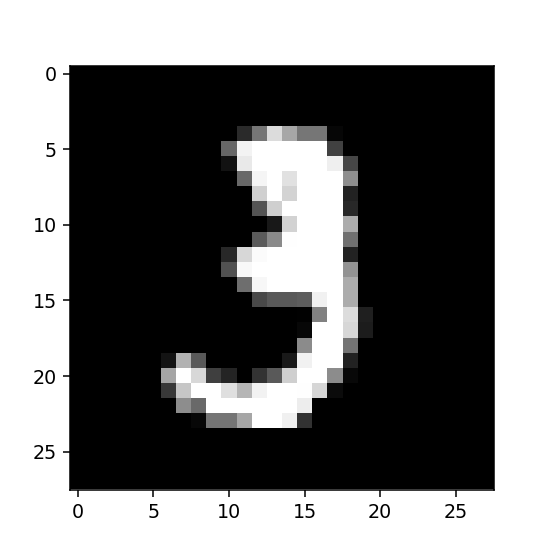

The above digit is 3


In [6]:
import matplotlib.pyplot as plt
#display or plot a number
plt.figure(figsize =(4,4))
idx=10

#converting the data point with index as idx into a numpy array of size 28 * 28
grid_data = X_train[idx].reshape(28,28)

plt.imshow(grid_data, interpolation ='none',cmap='gray')
plt.show()
print('The above digit is ' + str(y_train[idx]))

In [7]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


In [8]:
X_train[0].reshape(1, 784) 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
        126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  30,  36

In [9]:
X_train.shape[0], X_train.shape[1]*X_train.shape[2]

(60000, 784)

In [10]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [11]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [12]:
# An example data point
print(X_train[10]," length: ",len(X_train[10]))

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  42 118 219
 166 118 118   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18 232
 254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 207 254 210 254 254 254  34   0   0   0   

In [13]:

# before we move to apply machine learning algorithms lets try to normalize the data
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
X_test_minmax = mm_scaler.fit_transform(X_test)

In [14]:
# example data point after normlizing
X_train_minmax[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
# Starting our deep learning

from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [24]:
# some model parameters

output_dim = 10
input_dim = X_train_minmax.shape[1]

batch_size = 250
nb_epoch = 50

In [30]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [31]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes
model.add(Dense(350, input_dim=input_dim, activation='relu'))
# model.add(Dense(50, activation='relu'))
model.add(Dense(output_dim, activation='softmax'))


In [32]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors
 
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

    # Keras models are trained on Numpy arrays of input data and labels. 
    # For training a model, you will typically use the  fit function

    # fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
    # validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
    # validation_steps=None)

    # fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

    # it returns A History object. Its History.history attribute is a record of training loss values and 
    # metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

    # https://github.com/openai/baselines/issues/20

history = model.fit(X_train_minmax, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test_minmax, Y_test)) 


Epoch 1/50
240/240 [==============================] - 1s 4ms/step - loss: 1.4475 - accuracy: 0.6669 - val_loss: 0.8976 - val_accuracy: 0.8191
Epoch 2/50
240/240 [==============================] - 1s 4ms/step - loss: 0.7458 - accuracy: 0.8381 - val_loss: 0.5990 - val_accuracy: 0.8624
Epoch 3/50
240/240 [==============================] - 1s 5ms/step - loss: 0.5633 - accuracy: 0.8645 - val_loss: 0.4898 - val_accuracy: 0.8810
Epoch 4/50
240/240 [==============================] - 1s 5ms/step - loss: 0.4830 - accuracy: 0.8777 - val_loss: 0.4330 - val_accuracy: 0.8898
Epoch 5/50
240/240 [==============================] - 1s 4ms/step - loss: 0.4365 - accuracy: 0.8859 - val_loss: 0.3978 - val_accuracy: 0.8970
Epoch 6/50
240/240 [==============================] - 1s 4ms/step - loss: 0.4057 - accuracy: 0.8919 - val_loss: 0.3731 - val_accuracy: 0.9016
Epoch 7/50
240/240 [==============================] - 1s 4ms/step - loss: 0.3832 - accuracy: 0.8967 - val_loss: 0.3551 - val_accuracy: 0.9055
Epoch 

Test score: 0.18620814383029938
Test accuracy: 0.9462000131607056


<IPython.core.display.Javascript object>


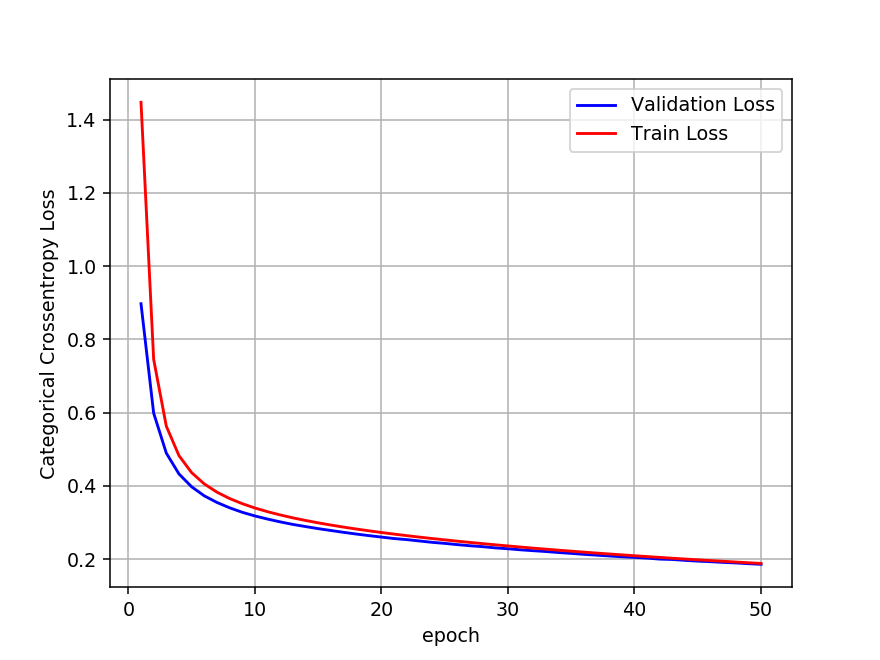

In [34]:
score = model.evaluate(X_test_minmax, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)